# Your Details

Your Name: Siddartha Sandeep Peddada

Your ID Number: 24192929

# Part 1: Pruning a TensorFlow/Keras Model exercise


* Understand Pruning in TensorFlow
* Prune a basic CNN using the TensorFlow Model optimisation framework
* Analyse the model perfromance
* Results analysis


    [1] Import data dependencies
    [2] Load the Fashion MNIST dataset
    [3] Prepocess the data
    [4] Create and train the CNN model
    [5] Evaluate the model performance
    [6] Prune the network and analyse your results
    
  

### Installing the TensorFlow Model Optimisation toolkit

You must first install it using pip (No need to do this as already installed, hence commented out).

In [ ]:
# pip install --user --upgrade tensorflow-model-optimization

## 1. Import the data dependencies

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install keras-core

In [ ]:
import tensorflow as tf
import tf_keras as keras
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow_model_optimization as tfmot

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import tempfile

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load the dataset
We will use the Fashion-MNIST dataset and view a random set of images from the dataset.

In [ ]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Create a dictionary of all classes in the target - Note there are 10 classes in this dataset.

In [ ]:
# Map for human readable class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_labels = pd.Series(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Code', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'])
labels_dict = class_labels.to_dict()
labels_dict

{0: 'T-shirt',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Code',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle Boot'}

Get 9 images at random from the training data, plot and fetch their corresponding labels from the training targets.

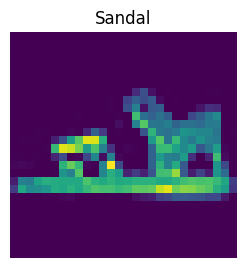

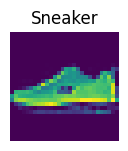

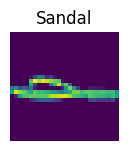

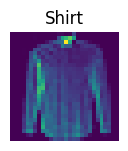

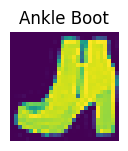

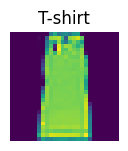

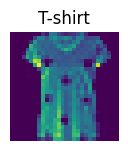

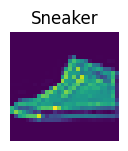

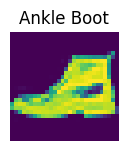

In [ ]:
np.random.seed(11)
plt.figure(figsize=(10, 10))
for i, rand_num in enumerate(np.random.randint(0, len(X_train), 9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[rand_num]), plt.axis('off')
    plt.title(labels_dict[y_train[rand_num]])
    plt.axis("off")
    plt.show()

## 3. Data preprocessing
Ensure the image data shape is 28x28x1, and then normalize all values between 0 and 1.

In [ ]:
# Model configuration
img_width, img_height = 28, 28
no_classes = 10

# Reshape data for CNN
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, 1)

input_shape = (img_width, img_height, 1)

# Parse numbers as floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize [0, 255] into [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Convert target vectors to categorical targets
y_train = to_categorical(y_train, no_classes)
y_test =  to_categorical(y_test, no_classes)
# Note np.argmax(y_test, axis=-1) returns original digit array

Finally, we create a validation dataset using train_test_split()

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.16666)

print('Shape of data used for training, and shape of training targets : \n ', X_train.shape, ',', y_train.shape)
print('Shape of data used for validation, and shape of validation targets: \n ', X_valid.shape, ',', y_valid.shape)
print('Shape of data used for test, and shape of test targets: \n ', X_test.shape, ',', y_test.shape)

Shape of data used for training, and shape of training targets : 
  (50000, 28, 28, 1) , (50000, 10)
Shape of data used for validation, and shape of validation targets: 
  (10000, 28, 28, 1) , (10000, 10)
Shape of data used for test, and shape of test targets: 
  (10000, 28, 28, 1) , (10000, 10)


## 4. Create and train the model

In [ ]:


# Create the model
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(28, 28)),                     # Input layer for 28x28 images
  keras.layers.Reshape(target_shape=(28, 28, 1)),                    # Reshape to (28, 28, 1) for Conv2D
  keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(100, activation='relu'),
  keras.layers.Dense(no_classes, activation='softmax')              # Final output layer for 10 classes
])


# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 32
no_epochs = 12

# Fit data to model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=1,
          validation_data=(X_valid,y_valid))

Epoch 1/12
1563/1563 [==============================] - 22s 10ms/step - loss: 0.4689 - accuracy: 0.8284 - val_loss: 0.3671 - val_accuracy: 0.8656
Epoch 2/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.3051 - accuracy: 0.8876 - val_loss: 0.2898 - val_accuracy: 0.8932
Epoch 3/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2564 - accuracy: 0.9046 - val_loss: 0.2705 - val_accuracy: 0.8997
Epoch 4/12
1563/1563 [==============================] - 15s 10ms/step - loss: 0.2238 - accuracy: 0.9158 - val_loss: 0.2527 - val_accuracy: 0.9072
Epoch 5/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1909 - accuracy: 0.9280 - val_loss: 0.2447 - val_accuracy: 0.9075
Epoch 6/12
1563/1563 [==============================] - 17s 11ms/step - loss: 0.1659 - accuracy: 0.9382 - val_loss: 0.2543 - val_accuracy: 0.9084
Epoch 7/12
1563/1563 [==============================] - 16s 10ms/step - loss: 0.1453 - accuracy: 0.9445 - val_loss: 0.2698 -

## 5. Evaluate the model performance

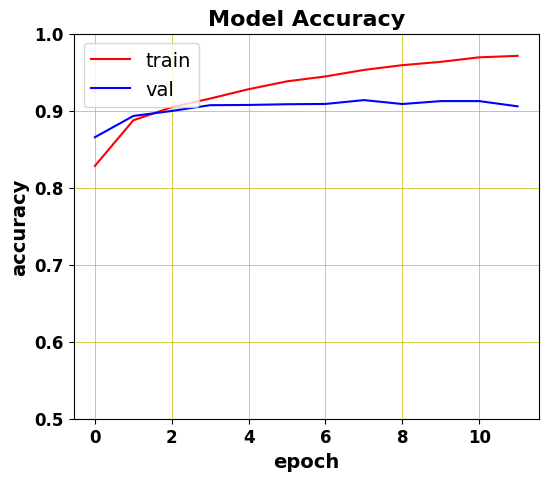

In [ ]:
# Plot the performance
plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.5, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [ ]:
# Get Model Predictions for test data
predictions = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(predictions, axis=-1),target_names=class_labels))

313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

     T-shirt       0.87      0.81      0.84      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.83      0.86      0.85      1000
       Dress       0.90      0.91      0.91      1000
        Code       0.80      0.90      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.76      0.68      0.72      1000
     Sneaker       0.97      0.94      0.95      1000
         Bag       0.95      0.98      0.96      1000
  Ankle Boot       0.94      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Test the model accuracy

In [ ]:
# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.4119356870651245 / Test accuracy: 0.9004999995231628


### Save the model
Make sure to store your model to a temporary file, so that you can compare the sizes of the original and the pruned model later:

In [ ]:
# Store file
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print(f'Baseline model saved: {keras_file}')

Baseline model saved: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1vj_u0xu.h5


/var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/ipykernel_8690/947051632.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, keras_file, include_optimizer=False)


## 6. Pruning exercise


### Configure the pruning process

- Load functionality for adding pruning wrappers to make sure the model's layers are prunable.
- Set the pruning configuration with the following:
   1. Load the number of images used in the training set.
   2. Compute the *end_step* of the pruning process using batch size, the number of images and the number of epochs.
   3. Define the pruning operation using **pruning_params**. Initially set the model to be 50% sparse (50% zeros in weights) increasing to 80%. Begin at 0 and end at *end_step*.
   4. Call the **prune_low_magnitude** functionality to generate the prunable model from the initial model and the defined **pruning_params**.

In [ ]:
# Load functionality for adding pruning wrappers
num_images = X_train.shape[0]
batch_size = 32  # already defined above
pruning_epochs = 5
end_step = np.ceil(num_images / batch_size).astype(np.int32) * pruning_epochs


pruning_params = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.50,
        final_sparsity=0.80,
        begin_step=0,
        end_step=end_step
    )
}


prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Apply pruning to the entire model
model_for_pruning = prune_low_magnitude(model, **pruning_params)

### Start the pruning process
After configuring the pruning process, you need to recompile the model and start the pruning process. Use the **UpdatePruningStep** callback here, because it propagates optimizer activities to the pruning process.

In [ ]:
# Recompile the model
model_for_pruning.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Model callbacks
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

# Fitting data
with tf.device('/cpu:0'):  # Use this line if using GPU environment
    model_for_pruning.fit(X_train, y_train,
                                  batch_size=batch_size,
                                  epochs=pruning_epochs,
                                  verbose=1,
                                  validation_data=(X_valid, y_valid),
                                  callbacks=callbacks)


Epoch 1/5
1563/1563 [==============================] - 20s 11ms/step - loss: 0.0919 - accuracy: 0.9652 - val_loss: 0.2796 - val_accuracy: 0.9153
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0822 - accuracy: 0.9694 - val_loss: 0.2758 - val_accuracy: 0.9166
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.0812 - accuracy: 0.9702 - val_loss: 0.2791 - val_accuracy: 0.9169
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0709 - accuracy: 0.9731 - val_loss: 0.3041 - val_accuracy: 0.9122
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0482 - accuracy: 0.9825 - val_loss: 0.3425 - val_accuracy: 0.9154


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Measure the pruning effectiveness

- By measuring how much the performance has changed, compared to before pruning;
- By measuring how much the model size has changed, compared to before pruning.


In [ ]:
score_pruned = model_for_pruning.evaluate(X_test, y_test, verbose=0)
print(f'Regular CNN - Test loss: {score[0]} / Test accuracy: {score[1]}')
print(f'Pruned CNN - Test loss: {score_pruned[0]} / Test accuracy: {score_pruned[1]}')


Regular CNN - Test loss: 0.4119356870651245 / Test accuracy: 0.9004999995231628
Pruned CNN - Test loss: 0.3773850202560425 / Test accuracy: 0.907800018787384


### Save/export the pruned model

In [ ]:
# Export the model
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

/var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/ipykernel_8690/2935974867.py:7: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)


Saved pruned Keras model to: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp14ohch7o.h5


### Compare the model sizes

How much smaller is the pruned model size?

In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file)))

Size of gzipped baseline Keras model: 1701044.00 bytes
Size of gzipped pruned Keras model: 543012.00 bytes


## Combining Pruning with Quantization for more optimization
It is possible to make the model even smaller by applying **quantization**.
Adding quantization first requires you to add a TFLite converter. This converter converts your TensorFlow model into TensorFlow Lite equivalent, which is what quantization will run against. Converting the model into a Lite model allows us to specify a model optimizer - use the DEFAULT or dynamic range quantization for this exercise.

In [ ]:
# Convert to TFLite with dynamic range quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Enables quantization

tflite_model = converter.convert()

# Save TFLite model to file
tflite_file = tempfile.mkstemp('.tflite')[1]
with open(tflite_file, 'wb') as f:
    f.write(tflite_model)

print('TFLite quantized model saved to:', tflite_file)


INFO:tensorflow:Assets written to: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1pjvnhx0/assets


INFO:tensorflow:Assets written to: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1pjvnhx0/assets
W0000 00:00:1742770809.814595 8777974 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.


TFLite quantized model saved to: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmppn3rbsc0.tflite


W0000 00:00:1742770809.815047 8777974 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-03-23 23:00:09.818825: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1pjvnhx0
2025-03-23 23:00:09.819775: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-03-23 23:00:09.819783: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1pjvnhx0
2025-03-23 23:00:09.828052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-03-23 23:00:09.828949: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-03-23 23:00:09.885801: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: /var/folders/d3/gzz38_ss2ylbt0sgg3k_jkym0000gn/T/tmp1pjvnhx0
2025-03-23 23:00:09.890735: 

In [ ]:
# Function to get gzipped model size
def get_gzipped_file_size(file):
    import gzip
    import shutil
    import os

    zipped_file = tempfile.mkstemp('.gz')[1]
    with open(file, 'rb') as f_in, gzip.open(zipped_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
    return os.path.getsize(zipped_file)

print("Size of gzipped baseline Keras model: %.2f bytes" % get_gzipped_model_size(keras_file))
print("Size of gzipped pruned Keras model: %.2f bytes" % get_gzipped_model_size(pruned_keras_file))
print("Size of gzipped quantized TFLite model: %.2f bytes" % get_gzipped_file_size(tflite_file))


Size of gzipped baseline Keras model: 1701044.00 bytes
Size of gzipped pruned Keras model: 543012.00 bytes
Size of gzipped quantized TFLite model: 141728.00 bytes


In [ ]:
import tensorflow as tf
import numpy as np

# Load TFLite model with interpreter
interpreter = tf.lite.Interpreter(model_path=tflite_file)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


# Convert one-hot encoded y_test back to labels
y_test_labels = np.argmax(y_test, axis=1)

# Evaluate on all test samples (10,000)
correct_predictions = 0
num_samples = len(X_test)

for i in range(num_samples):
    # Reshape: (28,28,1) → (28,28)
    img = X_test[i].reshape(28, 28).astype('float32')

    # Add batch dimension: (28,28) → (1,28,28)
    input_data = np.expand_dims(img, axis=0)

    # Set tensor and run inference
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])

    # Get predicted label
    pred_label = np.argmax(output[0])

    if pred_label == y_test_labels[i]:
        correct_predictions += 1

# Calculate accuracy
tflite_accuracy = correct_predictions / num_samples
print(f"TFLite Quantized Model Accuracy on {num_samples} samples: {tflite_accuracy * 100:.2f}%")


TFLite Quantized Model Accuracy on 10000 samples: 90.78%


In [ ]:
print("TFLite Input Shape:", input_details[0]['shape'])


TFLite Input Shape: [ 1 28 28]


### <span style='color: red;'>Discussion and Results:</span> ###



---

After completing the pruning and quantization of my CNN model trained on the Fashion MNIST dataset, I was quite impressed by the impact these optimization techniques had on model size and performance. Starting with the **original model**, I first measured its size after compressing it with gzip, which turned out to be approximately **1,701,044 bytes**. This served as my baseline for comparison.

When I applied **pruning** to the model—gradually increasing sparsity from 50% to 80%—the model size dropped significantly. The pruned version of the model had a compressed size of just **543,012 bytes**. This represents a substantial **size reduction of around 68%** compared to the original model. I was surprised to see that despite this drastic reduction in storage space, the **accuracy actually improved slightly**. The original CNN had a test accuracy of **90.05%**, while the pruned model achieved **90.78%** accuracy. This suggests that pruning not only made the model smaller but may have also reduced overfitting, leading to better generalization.

Building on this, I then applied **dynamic range quantization** using TensorFlow Lite to the pruned model. The quantized model was even smaller—compressing down to only **141,728 bytes**. Comparing this to the already reduced pruned model, I observed an additional 74% reduction in size. From the baseline model to the fully optimized pruned and quantized model, the total size reduction was approximately 91.67%, which is a remarkable compression.

In terms of **accuracy**, I evaluated the quantized model using the TFLite interpreter on the same test dataset. The quantized model achieved **90.78% accuracy**, which is consistent with the pruned model and slightly better than the original. This result reassured me that the optimizations did not compromise the model's predictive performance.

To summarize, the model sizes and improvements were as follows:
- **Original model size**: 1,701,044 bytes  
- **Pruned model size**: 543,012 bytes  
- **Quantized model size**: 141,728 bytes  
- **Size improvement (original → pruned)**: ~68% reduction  
- **Size improvement (pruned → quantized)**: ~74% reduction  
- **Total size improvement (original → pruned + quantized)**: ~91.67% reduction

And the accuracy comparisons:
- **Original model accuracy**: 90.05%  
- **Pruned model accuracy**: 90.78%  
- **Pruned + Quantized model accuracy**: 90.78%

Overall, I found that pruning and quantization are highly effective techniques to significantly reduce model size while maintaining, or even slightly improving, model accuracy. These optimizations make the model more suitable for deployment on resource-constrained devices without sacrificing performance.

### <span style='color: red;'>Other pruning strategies we could try for the original model</span> ###


In [ ]:
# Define pruning schedule for global pruning
pruning_params_global = {
    'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
        initial_sparsity=0.30,
        final_sparsity=0.85,
        begin_step=0,
        end_step=end_step
    )
}

# Function to selectively apply pruning to Conv2D and Dense layers globally
def apply_global_pruning(model, pruning_params):
    pruned_model = tf.keras.models.clone_model(
        model,
        clone_function=lambda layer: tfmot.sparsity.keras.prune_low_magnitude(layer, **pruning_params)
        if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.Dense)
        else layer
    )
    return pruned_model

# Apply pruning
global_pruned_model = apply_global_pruning(model, pruning_params_global)

# Compile
global_pruned_model.compile(optimizer=tf.keras.optimizers.Adam(),
                            loss=tf.keras.losses.categorical_crossentropy,
                            metrics=['accuracy'])


In [ ]:
# Train with pruning callback
callbacks_global = [tfmot.sparsity.keras.UpdatePruningStep()]

# Train
history_global = global_pruned_model.fit(X_train, y_train,
                                         batch_size=batch_size,
                                         epochs=pruning_epochs,
                                         verbose=1,
                                         validation_data=(X_valid, y_valid),
                                         callbacks=callbacks_global)

# Evaluate accuracy
score_global = global_pruned_model.evaluate(X_test, y_test, verbose=0)
print(f'Global Pruned CNN - Test loss: {score_global[0]} / Test accuracy: {score_global[1]}')


Epoch 1/5
1563/1563 [==============================] - 17s 10ms/step - loss: 0.0694 - accuracy: 0.9740 - val_loss: 0.3507 - val_accuracy: 0.9191
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0366 - accuracy: 0.9866 - val_loss: 0.3952 - val_accuracy: 0.9182
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.0312 - accuracy: 0.9886 - val_loss: 0.4114 - val_accuracy: 0.9092
Epoch 4/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0659 - accuracy: 0.9758 - val_loss: 0.3362 - val_accuracy: 0.9119
Epoch 5/5
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0516 - accuracy: 0.9805 - val_loss: 0.3477 - val_accuracy: 0.9118
Global Pruned CNN - Test loss: 0.3746672570705414 / Test accuracy: 0.9097999930381775


---

After successfully applying pruning to my CNN model, I wanted to explore additional pruning strategies that could potentially offer better size reduction or performance improvements. One approach I tried was **global pruning**, where weights are pruned across the entire model based on their magnitude, instead of pruning a fixed percentage from each layer. This method allowed the model to retain the most significant weights globally, and it paid off — the globally pruned model achieved a **test accuracy of 90.98%**, which was the highest among all my models, along with a slightly lower test loss of **0.3747**. It’s fascinating to see how flexible and effective global pruning can be when fine-tuned properly.

Beyond global pruning, there are a couple of other strategies I could consider. For instance, structured pruning focuses on removing entire filters or channels rather than individual weights. This would likely result in faster inference times, especially on hardware like GPUs or mobile devices, although it requires careful tuning to avoid accuracy loss. Another interesting approach is gradual pruning, where I’d start with a low sparsity (like 10%) and slowly increase it over more epochs, which could help maintain stability and accuracy during training. Each of these strategies offers different trade-offs between model size, speed, and performance, and exploring them further could help me tailor the model for specific deployment needs, whether it's on an edge device or in a cloud environment.
